# Peak number comparison

In [1]:
import os
import glycoproteomics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
from pprint import pprint
matplotlib_inline.backend_inline.set_matplotlib_formats("png")
figure_size = (8, 4)
dpi = 100

spectra_folder = "/Users/jonesm5/Dropbox (The Francis Crick)/20210707_Rep1"

In [2]:
spectra = glycoproteomics.io.read_spectra_directory(spectra_folder)
pprint(spectra.keys())
ref_spectrum_name = list(spectra.keys())[0]
ref_ions = glycoproteomics.spectrum.list_ions(spectra[ref_spectrum_name])
print(ref_ions)

dict_keys(['20210702_Kuebler_54_P1_A8_HD-7_1.wiff.dia.extracted.txt', '20210702_Kuebler_26_P1_A1_CV-24C_1.wiff.dia.extracted.txt', '20210702_Kuebler_56_P2_B1_PlasmaPooled_4.wiff.dia.extracted.txt', '20210702_Kuebler_25_P1_G7_CV-64_1.wiff.dia.extracted.txt', '20210702_Kuebler_29_P1_G4_CV-13_1.wiff.dia.extracted.txt', '20210702_Kuebler_38_P2_B1_PlasmaPooled_3.wiff.dia.extracted.txt', '20210702_Kuebler_22_P1_D7_CV-48_1.wiff.dia.extracted.txt', '20210702_Kuebler_16_P1_H3_CV-16_1.wiff.dia.extracted.txt', '20210702_Kuebler_34_P1_C3_CV-9_1.wiff.dia.extracted.txt', '20210702_Kuebler_40_P1_H6_CV-35_1.wiff.dia.extracted.txt', '20210702_Kuebler_39_P1_H8_HD-6_1.wiff.dia.extracted.txt', '20210702_Kuebler_9_P1_H5_CV-37_1.wiff.dia.extracted.txt', '20210702_Kuebler_33_P1_C1_Plasma-11_1.wiff.dia.extracted.txt', '20210702_Kuebler_3_P1_G1_HD-1B_1.wiff.dia.extracted.txt', '20210702_Kuebler_43_P1_B7_CV-38_1.wiff.dia.extracted.txt', '20210702_Kuebler_8_P1_F2_CV-25_1.wiff.dia.extracted.txt', '20210702_Kueble

Bin the spectra to make them easier to work with and merge

In [3]:
rt_x_bin_size = 0.025
mz_y_bin_size = 1.5

binned_spectra = {
    name: glycoproteomics.spectrum.bin(
        spectrum,
        rt_x_bin_size,
        mz_y_bin_size,
        np.mean
    ) for name, spectrum in spectra.items()
}
del(spectra)

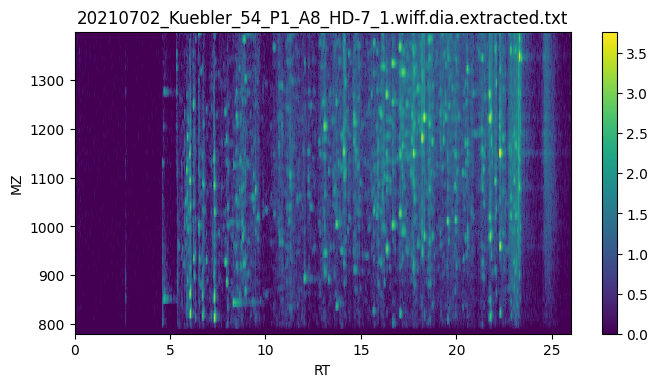

In [4]:
merged_ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(
    binned_spectra[ref_spectrum_name],
    ref_ions
)
glycoproteomics.plotting.plot_ion_matrix(
    merged_ion_matrix,
    x_label,
    y_label,
    ref_spectrum_name,
    figure_size,
    dpi
)
plt.show()

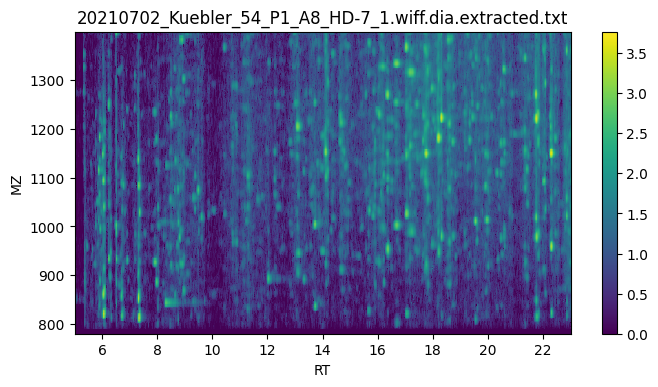

In [5]:
min_rt = 5.0
max_rt = 23.0

filtered_binned_spectra = {
    name: glycoproteomics.spectrum.filter_rt(
        binned_spectrum,
        min_rt,
        max_rt
    ) for name, binned_spectrum in binned_spectra.items()
}
del(binned_spectra)

merged_ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(
    filtered_binned_spectra[ref_spectrum_name],
    ref_ions
)
glycoproteomics.plotting.plot_ion_matrix(
    merged_ion_matrix,
    x_label,
    y_label,
    ref_spectrum_name,
    figure_size,
    dpi
)
plt.show()

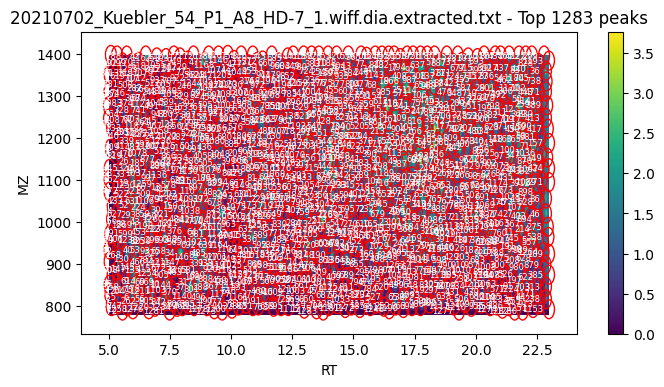

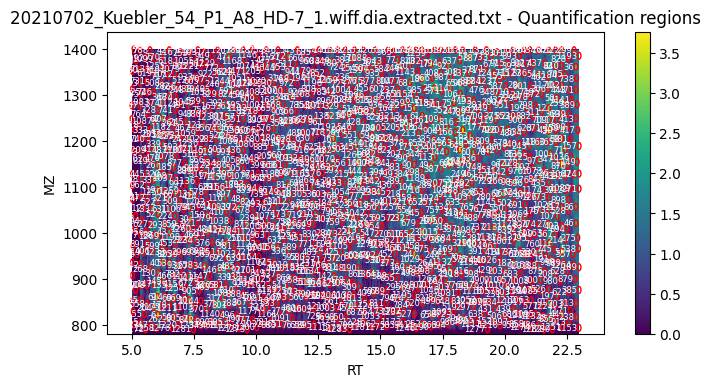

In [6]:
top_N_peaks = 10000

quantify_x_radius = rt_x_bin_size * 3.0
quantify_y_radius = mz_y_bin_size * 5.0

exclusion_x_radius = quantify_x_radius * 3.0
exclusion_y_radius = quantify_y_radius * 3.0

peaks = glycoproteomics.peaks.find(
    merged_ion_matrix,
    x_label,
    y_label,
    top_N_peaks,
    exclusion_x_radius,
    exclusion_y_radius
)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    merged_ion_matrix,
    x_label,
    y_label,
    peaks,
    exclusion_x_radius,
    exclusion_y_radius,
    ref_spectrum_name + " - Top {} peaks".format(len(peaks)),
    figure_size,
    dpi
)
plt.show()

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    merged_ion_matrix,
    x_label,
    y_label,
    peaks,
    quantify_x_radius,
    quantify_y_radius,
    ref_spectrum_name + " - Quantification regions",
    figure_size,
    dpi
)
plt.show()

In [9]:
for name, spectrum in filtered_binned_spectra.items():
    merged_ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(
        spectrum,
        ref_ions
    )
    peaks = glycoproteomics.peaks.find(
        merged_ion_matrix,
        x_label,
        y_label,
        top_N_peaks,
        exclusion_x_radius,
        exclusion_y_radius
    )
    print("{}: {}".format(name, len(peaks)))


20210702_Kuebler_54_P1_A8_HD-7_1.wiff.dia.extracted.txt: 1283
20210702_Kuebler_26_P1_A1_CV-24C_1.wiff.dia.extracted.txt: 1275
20210702_Kuebler_56_P2_B1_PlasmaPooled_4.wiff.dia.extracted.txt: 1297
20210702_Kuebler_25_P1_G7_CV-64_1.wiff.dia.extracted.txt: 1309
20210702_Kuebler_29_P1_G4_CV-13_1.wiff.dia.extracted.txt: 1290
20210702_Kuebler_38_P2_B1_PlasmaPooled_3.wiff.dia.extracted.txt: 1301
20210702_Kuebler_22_P1_D7_CV-48_1.wiff.dia.extracted.txt: 1258
20210702_Kuebler_16_P1_H3_CV-16_1.wiff.dia.extracted.txt: 1288
20210702_Kuebler_34_P1_C3_CV-9_1.wiff.dia.extracted.txt: 1277
20210702_Kuebler_40_P1_H6_CV-35_1.wiff.dia.extracted.txt: 1291
20210702_Kuebler_39_P1_H8_HD-6_1.wiff.dia.extracted.txt: 1281
20210702_Kuebler_9_P1_H5_CV-37_1.wiff.dia.extracted.txt: 1292
20210702_Kuebler_33_P1_C1_Plasma-11_1.wiff.dia.extracted.txt: 1280
20210702_Kuebler_3_P1_G1_HD-1B_1.wiff.dia.extracted.txt: 1295
20210702_Kuebler_43_P1_B7_CV-38_1.wiff.dia.extracted.txt: 1275
20210702_Kuebler_8_P1_F2_CV-25_1.wiff.dia

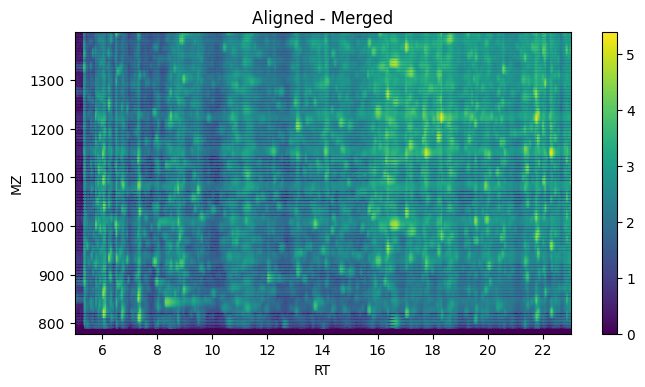

In [7]:
filtered_binned_aligned_sample_spectra = {}
rt_alignment_mappings = {}
for name, spectra in filtered_binned_spectra.items():
    aligned_spectra, rt_alignment = glycoproteomics.spectrum.align_rt(
        spectra,
        filtered_binned_spectra[ref_spectrum_name],
        1,
        False
    )
    filtered_binned_aligned_sample_spectra[name] = aligned_spectra
    rt_alignment_mappings[name] = rt_alignment

merged_spectrum = glycoproteomics.spectrum.combine(
    filtered_binned_aligned_sample_spectra,
    np.sum
)
merged_ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(
    merged_spectrum,
    ref_ions
)
glycoproteomics.plotting.plot_ion_matrix(
    merged_ion_matrix,
    x_label,
    y_label,
    "Aligned - Merged",
    figure_size,
    dpi
)
plt.show()

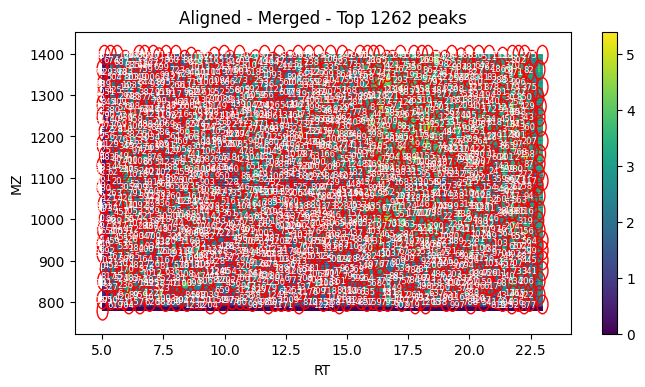

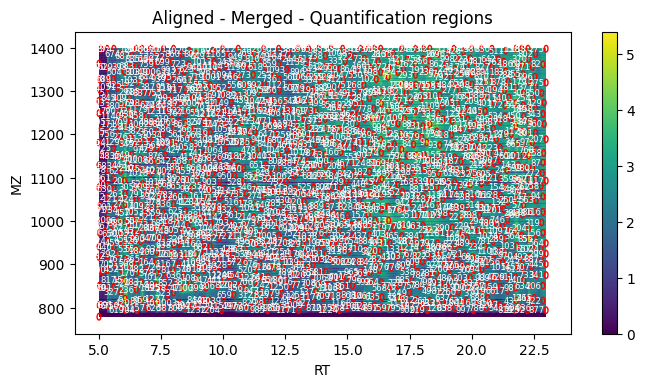

In [8]:
peaks = glycoproteomics.peaks.find(
    merged_ion_matrix,
    x_label,
    y_label,
    top_N_peaks,
    exclusion_x_radius,
    exclusion_y_radius
)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    merged_ion_matrix,
    x_label,
    y_label,
    peaks,
    exclusion_x_radius,
    exclusion_y_radius,
    "Aligned - Merged - Top {} peaks".format(len(peaks)),
    figure_size,
    dpi
)
plt.show()

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    merged_ion_matrix,
    x_label,
    y_label,
    peaks,
    quantify_x_radius,
    quantify_y_radius,
    "Aligned - Merged - Quantification regions",
    figure_size,
    dpi
)
plt.show()